In [1]:
from sklearn.datasets import make_regression
# disturbance 없음, => noise = 0
X, y, w= make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0, n_targets=1)

In [2]:
w # 기울기 

array(79.17250380826646)

In [3]:
X.shape, y.shape

((10, 1), (10,))

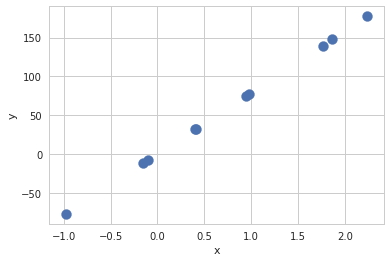

In [4]:
%matplotlib inline
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

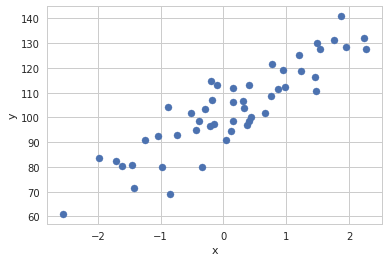

In [5]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=50) # s : marker size
plt.xlabel("x")
plt.ylabel("y")
plt.show() 
# 오차의 표준편차를 10으로 - > 
# x 가 0 일때 y가 100이 나와야 하지만 110~90 사이의 값이 나옴(오차 정규분포)

In [6]:
X, y= make_regression(n_samples=10, n_features=1, bias=100, noise=10, coef=False, random_state=0)
X.shape, y.shape

((10, 1), (10,))

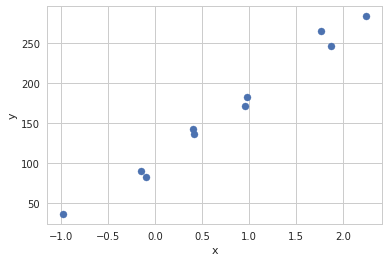

In [7]:
plt.scatter(X, y, s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

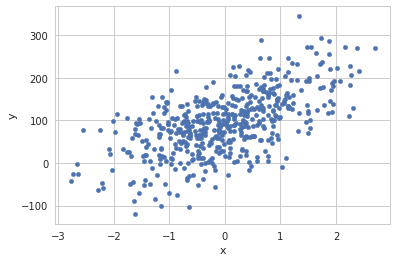

In [8]:
X, y, w = make_regression(n_samples=500, n_features=1, bias=100, noise=60,
                          coef=True, random_state=0)
plt.scatter(X, y, s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.show() 


In [9]:
def make_regression2(n_samples, bias, noise, random_state):

    np.random.seed(random_state) # 난수 발생 시작값
    
    b = bias  # y 절편
    
    x = np.random.randn(n_samples, 1) # 1차원 독립 변수 from 표준정규분포
    w = np.random.rand(1) *10 # 해값 from uniform [0 부터 1 값이 나옴]
    
    rv = sp.stats.norm(loc = 0, scale =  noise) # 정규분포 생성(0, noise)
    e  = rv.rvs(n_samples) # 오차 샘플 추출
    
    y = b + np.dot(x, w) + e
    
    return x, y, w

In [10]:
x, y, w= make_regression2(10, 0, 0, 0)

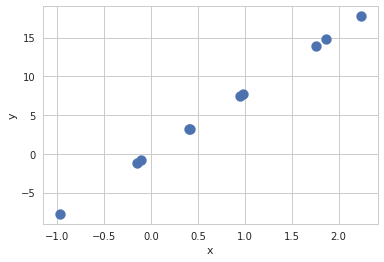

In [11]:
plt.scatter(x, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

In [12]:
x, y, w= make_regression2(n_samples=50, bias = 100, 
                          noise = 1, random_state=0)

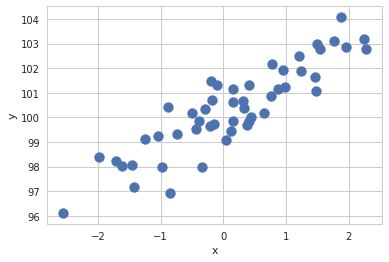

In [13]:
plt.scatter(x, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

In [14]:
def make_regression3(n_samples, n_feature, bias, noise, coef, random_state):
    np.random.seed(random_state) # 난수 발생 시작값
    # n_feature차원 독립 변수 ~표준정규분포
    x = np.random.randn(n_samples, n_feature) * 100
    w = np.random.rand(1) * coef # ~ uniform
    e  = sp.stats.norm(loc = 0, scale =  noise).rvs(n_samples)# 오차 샘플 추출
    b = bias  # y 절편

    y = b + np.dot(x, w) + e
    
    return x, y

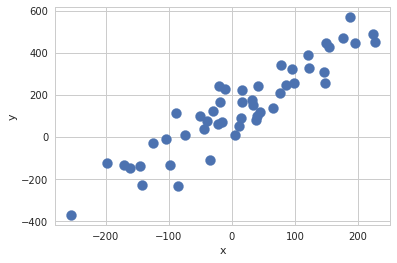

In [15]:
x, y = make_regression3(n_samples=50, n_feature=1, bias = 100, coef = 12,
                          noise = 100, random_state=0)
plt.scatter(x, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

---

### Numpy - regression

In [16]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, 
                              n_features=1, bias=bias, noise=10, 
                              coef=True, random_state=1)
X = sm.add_constant(X0) # augmentation
y = y.reshape(len(y), 1)

In [17]:
coef

array(80.71051956187792)

w = (X.T * X)^(-1) * X.T * y

$$w = (X^TX)^{-1} X^T y$$

In [18]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[ 102.02701439],
       [  81.59750943]])

y = Xw

In [19]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

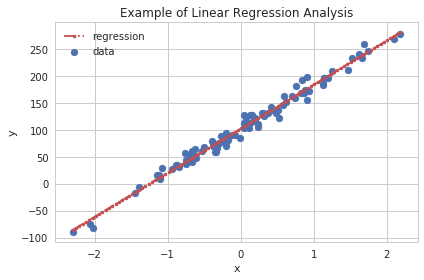

In [20]:
x_new = np.linspace(np.min(X0), np.max(X0), 100) 
X_new = sm.add_constant(x_new)  # 오그멘테이션

y_new = np.dot(X_new, w) # x와 1:1 대응하는 y

plt.scatter(X0, y, label="data")

plt.plot(x_new, y_new, 'r.-.' ,label="regression")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.tight_layout()
plt.show()

#### Scikit-Learn / regression

In [21]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston() 

# 선형회귀 클래스 객체 생성
model_boston = LinearRegression(fit_intercept=True) # fit_inter : 상수항
# fit : 모형 추정 - 자동 augmentation
model_boston.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

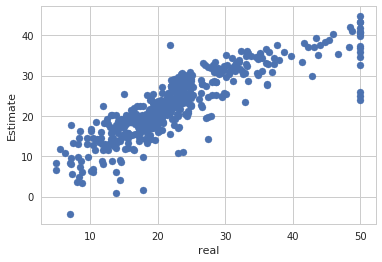

In [22]:
# y_new = model.predict(x_new) : 새로운 입력 데이터에 대한 출력 데이터 예측
predictions = model_boston.predict(boston.data) # 실제 데이터를 넣어 모형평가

plt.scatter(boston.target, predictions)
plt.xlabel("real")
plt.ylabel("Estimate")
plt.show()

연습
1. LinearRegresstion 클래스 사용하여 1차원 가상 데이터 X, y 회귀분석
1. 예측치와 실제 데이터간 오차 분석
1. 시드값을 다르게 하여 분석, 오차의 일반적 크기 측정

In [23]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)

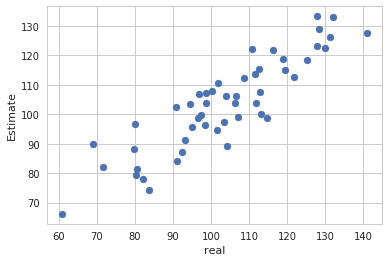

In [24]:
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

plt.scatter(y, predictions)
plt.xlabel("real")
plt.ylabel("Estimate")
plt.show()

56.6172365765


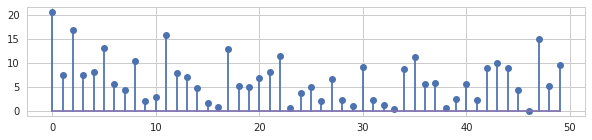

In [25]:
figure = plt.figure(figsize = (10,2))
plt.stem(abs(predictions - y))
print(np.linalg.norm(predictions-y))
plt.show()

69.1671385267 65.8828178305


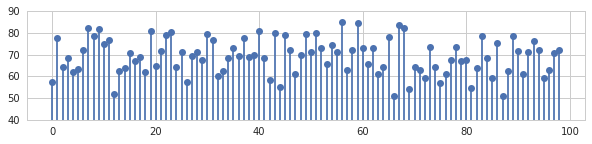

In [26]:
norm = np.array([])
for i in range(1, 100):
    X, y= make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                              coef=False, random_state=i)
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    norm = np.append(norm, np.linalg.norm(predictions-y))

print(norm.mean(), norm.var())
plt.figure(figsize=(10,2))
plt.stem(norm)
plt.ylim(40,90)
plt.show()

---

#### StatsModels / LinearRegression

`model = sm.OLS(y, X)` # 클래스 객체 생성

`result = model.fit()` # 모형 추정 - RegressionResults 객체 리턴

`result.summary()` # RegressionResults객체 - 리포트 리턴

`y_new = result.predict(x_new)` #새로운 입력데이터에 대한 출력 데이터 예측
-> augmentation 필요

In [27]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0) # augmentation
dfy = pd.Series(boston.target) # target 추출 / dataframe으로하면 다른값이 나옴

model_boston2 = sm.OLS(dfy, dfX) # 클래스 객체 생성
result_boston2 = model_boston2.fit() # 모형 추정
result_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        11:47:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

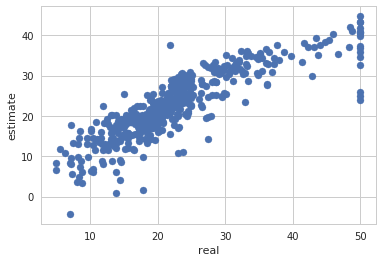

In [28]:
dfy_new = result_boston2.predict(dfX) # 실제 데이터를 넣어 모형평가
plt.scatter(dfy, dfy_new)
plt.xlabel("real")
plt.ylabel("estimate")
plt.show()

In [29]:
x_new = [4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13]

In [30]:
dfX0.mean()

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [31]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, 
                                       columns=boston.feature_names), 
                          has_constant="add")
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,4.0,11.0,11.0,0.1,0.6,6.0,70.0,4.0,10.0,410.0,20.0,360.0,13.0


In [32]:
result_boston2.predict(dfx_new)

0    18.854172
dtype: float64

연습2
1. OLS사용하여 1차원 가상데이터 x, y분석
1. 임의의 값 `X_new = 1.0` 지정하여 모형예측치 `y_new` 출력

In [33]:
X, y, w = make_regression(n_samples=500, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)

In [34]:
X0 = pd.DataFrame(X, columns=["X"])
X = sm.add_constant(X0, has_constant="add") # augmentation
y = pd.Series(y)

In [35]:
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.103e+04
Date:                Sun, 04 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:47:04   Log-Likelihood:                -1842.9
No. Observations:                 500   AIC:                             3690.
Df Residuals:                     498   BIC:                             3698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.2309      0.433    229.433      0.000      98.381     100.081
X             45.4969      0.433    105.034      0.000      44.646      46.348
==============================================================================
Omnibus:                        0.867   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.846
Skew:                          -0.100   Prob(JB):                        0.655
Kurtosis:                       2.984   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

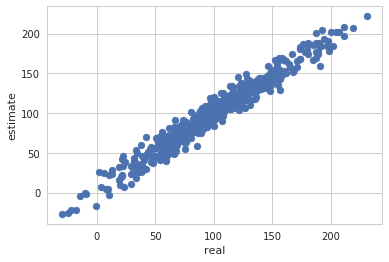

In [36]:
y_predict = result.predict(X) # 실제 데이터로 모형 평가
plt.scatter(y, y_predict)
plt.xlabel("real")
plt.ylabel("estimate")
plt.show()

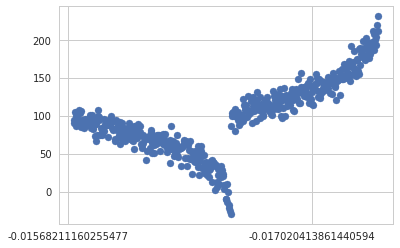

In [37]:
plt.scatter(X0, y)
plt.xticks(range(-10, 500, 400))
plt.show()

In [38]:
X_new = [1.0]

In [39]:
X_new = sm.add_constant(pd.DataFrame(np.array(X_new)[:, np.newaxis].T, 
                                       columns=["X_new"]), 
                          has_constant="add")

In [40]:
X_new

,const,X_new
0,1.0,1.0


In [41]:
y_new = result.predict(X_new)
y_new

0    144.727789
dtype: float64

---

`RegressionResults` 클래스는 다양한 분석결과를 내포함
- `resid` 잔차 벡터
- `params` 모수 벡터

In [42]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [43]:
result_boston2.resid.tail()

501    -1.132617
502    -1.778698
503    -3.729342
504    -4.129838
505   -10.448703
dtype: float64

그외

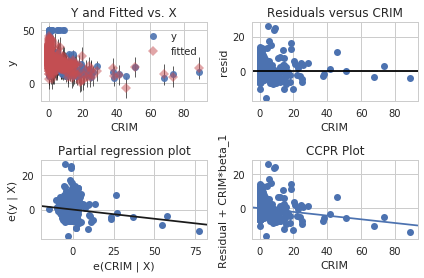

In [44]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()